Mounted at /content/drive


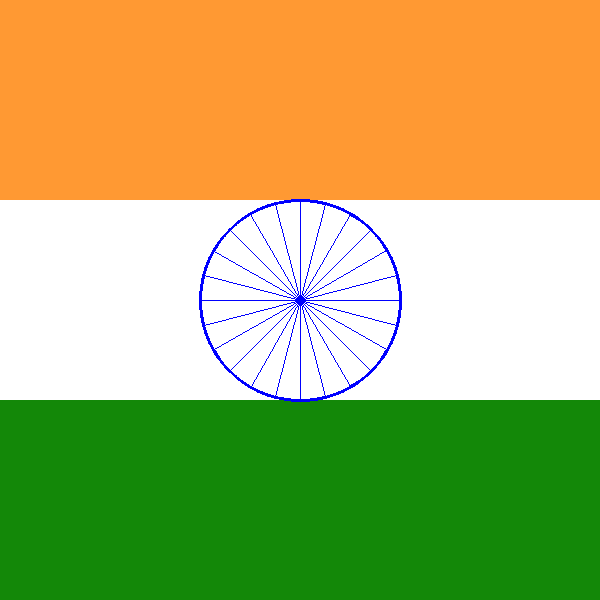

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

def generate():
  img=np.ones((600,600,3),"uint8")
  cv2.rectangle(img,(0,0),(599,199),(51,153,255),-1)
  cv2.rectangle(img,(0,200),(599,399),(255,255,255),-1)
  cv2.rectangle(img,(0,400),(599,599),(8,136,19),-1)
  cv2.circle(img,(300,300),100,(255,0,0),2)
  #draw spokes
  for i in range(24):
    x=int(100*np.cos(i*np.pi/12))
    y=int(100*np.sin(i*np.pi/12))
    cv2.line(img,(300,300),(x+300,y+300),(255,0,0),1)
  return img

def rotate(img,y):
  M=cv2.getRotationMatrix2D((300,300),y,1)
  rotated_img=cv2.warpAffine(img,M,(600,600))
  return rotated_img

def rotatedFlags():
  img=generate()
  global rotated_0
  global rotated_90
  global rotated_180
  global rotated_270
  rotated_0=img
  rotated_90=rotate(img,90)
  rotated_180=rotate(img,180)
  rotated_270=rotate(img,270)
rotatedFlags()

def unskew(s):
  img=cv2.imread(s)
  orange=[52,153,255]
  white=[255,255,255]
  green=[0,128,1]
  _,idx1=np.unique(img[:,299],return_index=True,axis=0)   #get all unique colours
  _,idx2=np.unique(img[299,:],return_index=True,axis=0)
  vert=img[:,299][np.sort(idx1)]
  horz=img[299,:][np.sort(idx2)]
  vertical=[]
  horizontal=[]
  for i in range(len(vert)):                              #include only orange, white and green
    if(vert[i]==orange).all():
      vertical.append(orange)
    elif(vert[i]==white).all():
      vertical.append(white)
    elif(vert[i]==green).all():
      vertical.append(green)
  for i in range(len(horz)):
    if(horz[i]==orange).all():
      horizontal.append(orange)
    elif(horz[i]==white).all():
      horizontal.append(white)
    elif(horz[i]==green).all():
      horizontal.append(green)

  if(vertical[0][0]==255):                                #display unskewed image based on the order of colours
    if(horizontal[0][0]==52):
      return rotated_90
    else:
      return rotated_270
  else:
    if(vertical[0][0]==52):
      return rotated_0
    else:
      return rotated_180

cv2_imshow(unskew(r'/content/drive/MyDrive/warpedflag4.jpeg'))

